# Calssification of Iris dataset

###  Read the dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
X = df.drop(labels=['species'],axis=1)
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['species'] = le.fit_transform(Y.species)

In [11]:
Y.value_counts()

species
0          50
1          50
2          50
dtype: int64

Save Label Encoder

In [12]:
import pickle
with open('LableEnc.pkl','wb') as file:
    pickle.dump(le,file)

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
Xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Save Scalar in pkl file

In [14]:
with open('Scaler.pkl','wb') as file:
    pickle.dump(ss,file)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.33,random_state=42)

In [17]:
param = {'n_neighbors':[3,4,5,6,7,8,9,10]}

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
cv = GridSearchCV(knn,param,cv=10,scoring='f1_macro')
cv.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

In [19]:
cv.best_params_

{'n_neighbors': 4}

In [20]:
cv.best_score_

0.938015873015873

In [21]:
model = cv.best_estimator_
model

KNeighborsClassifier(n_neighbors=4)

In [22]:
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [23]:
model.score(xtrain,ytrain)

0.96

In [24]:
model.score(xtest,ytest)

0.96

In [25]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

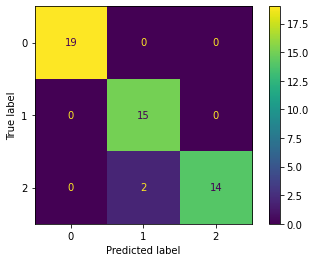

In [27]:
cm = confusion_matrix(ytest,ts_pred)
cmd = ConfusionMatrixDisplay(cm,display_labels=model.classes_)
cmd.plot()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      1.00      0.94        15
           2       1.00      0.88      0.93        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [29]:
tr_pred_lbl = le.inverse_transform(tr_pred)
ts_pred_lbl = le.inverse_transform(ts_pred)

In [30]:
tr_pred_lbl

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versico

In [31]:
ts_pred_lbl

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

Predicting new Datapoint

In [32]:
def predict_data(scaler,le,model):
    sep_l = float(input('Please enter Sepal Length : '))
    sep_w = float(input('please enter sepal width  : '))
    pet_l = float(input('Please enter petal length : '))
    pet_w = float(input('please enter petal width  : '))

    X_test = pd.DataFrame([sep_l,sep_w,pet_l,pet_w]).T
    X_test.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    print('DataFrame Before Preprocessing : \n')
    display(X_test)

    Xnew_pre = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    print('Dataframe after preprocessing: \n ')
    display(Xnew_pre)

    pred = model.predict(Xnew_pre)

    pred1 = le.inverse_transform(pred)

    prob = model.predict_proba(Xnew_pre).max()

    print('\n=======================================================\n')
    print(f'Prediction    : {pred1[0]}')
    print(f'Probability : {prob:.4f}')

    return pred1[0],prob


In [33]:
predict_data(ss,le,model)

DataFrame Before Preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,6.0,4.0,3.0,1.2


Dataframe after preprocessing: 
 


,sepal_length,sepal_width,petal_length,petal_width
0,0.18983,2.169988,-0.430828,0.000878




Prediction    : setosa
Probability : 1.0000


('setosa', 1.0)